<a href="https://colab.research.google.com/github/mrmendapara/Python-ML/blob/master/TensorFlow_Manthan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


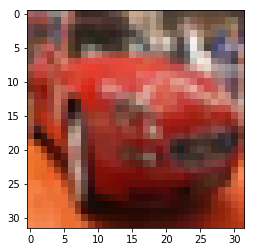

In [63]:
plt.imshow(x_train[5])

In [64]:
x_train.shape

(50000, 32, 32, 3)

In [65]:
y_train.shape

(50000, 1)

In [0]:
x_train_flat = []
for i in range(0,len(x_train)):
  x_train_flat.append(np.ndarray.flatten(x_train[i]))

In [67]:
print(np.array(x_train_flat).shape)

(50000, 3072)


In [0]:
target = np.ndarray.flatten(y_train)

In [0]:
def one_hot(scalar):
  temp_arr = [0]*10
  temp_arr[scalar] = 1
  return temp_arr

In [70]:
target.shape

(50000,)

In [0]:
Y_oneHot = []

for i in range(len(target)):
  Y_oneHot.append(one_hot(target[i]))
  
Y_oneHot = np.array(Y_oneHot)

In [0]:
import tensorflow as tf

In [0]:
Num_Features = 3072

In [0]:
X_PH = tf.placeholder(tf.float64,[None,Num_Features])
Y_PH = tf.placeholder(tf.float64,[None,10])

In [0]:
M1 = np.random.randn(Num_Features,Num_Features)
M1 = tf.Variable(M1)

In [76]:
print("Data Shape: ",X_PH.shape)
print("M1 Shape:",M1.shape)

Data Shape:  (?, 3072)
M1 Shape: (3072, 3072)


In [0]:
L1Out = tf.nn.sigmoid(tf.matmul(X_PH,M1))

In [0]:
M2 = np.random.randn(Num_Features,Num_Features)
M2 = tf.Variable(M2)

In [0]:
L2Out = tf.nn.sigmoid(tf.matmul(L1Out,M2))

In [0]:
M3 = np.random.randn(Num_Features,Num_Features)
M3 = tf.Variable(M3)

In [0]:
L3Out = tf.nn.sigmoid(tf.matmul(L2Out,M3))

In [82]:
M4 = np.random.randn(Num_Features,Num_Features)
M4 = tf.Variable(M4)
L4Out = tf.nn.sigmoid(tf.matmul(L3Out,M4))

print(L4Out)

M5 = np.random.randn(Num_Features,Num_Features)
M5 = tf.Variable(M5)
L5Out = tf.nn.sigmoid(tf.matmul(L4Out,M5))

M6 = np.random.randn(Num_Features,Num_Features)
M6 = tf.Variable(M6)
L6Out = tf.nn.sigmoid(tf.matmul(L5Out,M6))

Tensor("Sigmoid_10:0", shape=(?, 3072), dtype=float64)


In [0]:
M7 = np.random.randn(Num_Features,10)
M7 = tf.Variable(M7)

In [0]:
FinalOut = tf.nn.sigmoid(tf.matmul(L6Out,M7))

In [85]:
FinalOut.shape

TensorShape([Dimension(None), Dimension(10)])

In [0]:
cost = tf.reduce_mean(tf.square(FinalOut - Y_PH))
Optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
Minimize_The_Error = Optimizer.minimize(cost)
Init = tf.global_variables_initializer()
S = tf.Session()
S.run(Init)

In [87]:
from IPython.display import clear_output
iterations = 20
error = []
BATCH_SIZE = 1
for i in range(iterations):
  random_indices = np.random.randint(0,len(x_train_flat),size = BATCH_SIZE)
  FD = {X_PH: np.array(x_train_flat[random_indices]),Y_PH:np.array(Y_oneHot[random_indices])}
  S.run(Minimize_The_Error,feed_dict = FD)
  error.append(S.run(cost,feed_dict = FD))
  clear_output(True)
  print("Current Iteration:", i, "Current Cost: ",S.run(cost,feed_dict = FD))

TypeError: ignored